In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **EDA**

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# **VISUALISATION**

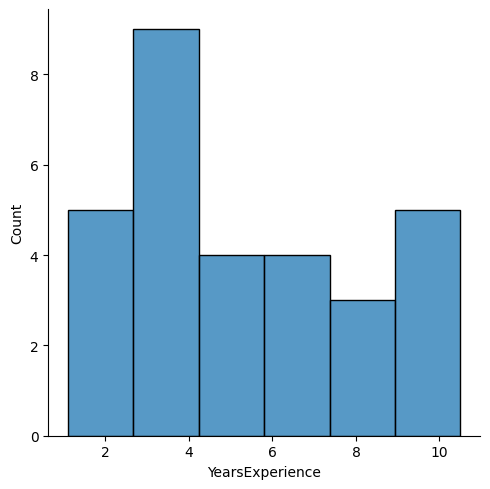

In [7]:
sns.displot(data['YearsExperience'])

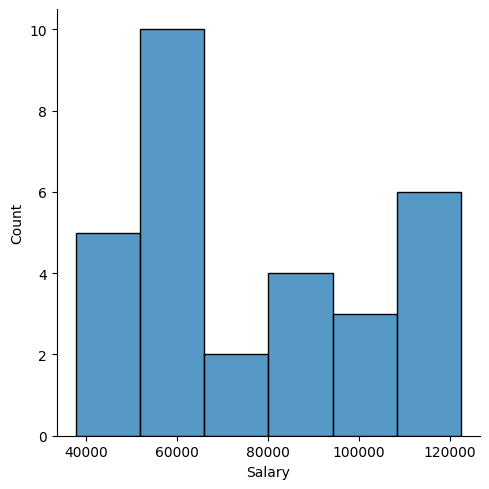

In [8]:
sns.displot(data['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

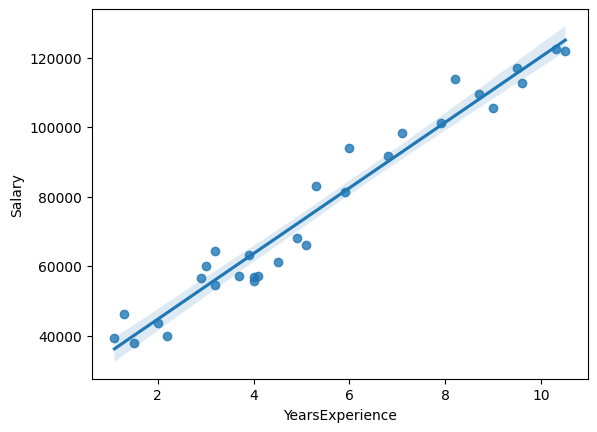

In [9]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
#model building
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [12]:
#model testing
print('Parameters: ',model.params)
print('tvalues: ',model.tvalues,'pvalues: ',model.pvalues)

Parameters:  Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
tvalues:  Intercept          11.346940
YearsExperience    24.950094
dtype: float64 pvalues:  Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [13]:
#R-squared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [14]:
#model predictions
pred_data=pd.Series([6,8])
pred_data=pd.DataFrame(pred_data,columns=['YearsExperience'])
pred_data

,YearsExperience
0,6
1,8


In [15]:
model.predict(pred_data)

0     82491.974127
1    101391.898770
dtype: float64

# **LOG TRANSFORMATION**

In [27]:
from sklearn.linear_model import LinearRegression

# Extract the independent and dependent variables
years_of_experience = data['YearsExperience'].values.reshape(-1, 1)
salary = data['Salary'].values

# Apply log transformation to both years of experience and salary
log_years_of_experience = np.log(years_of_experience)
log_salary = np.log(salary)

In [28]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(log_years_of_experience, log_salary)


LinearRegression()

In [29]:
# Print the model coefficients
print('Intercept:', model.intercept_)
print('Years of Experience coefficient:', model.coef_[0])

# Predict salary for 10 years of experience
log_predicted_salary = model.predict([[np.log(10)]])
predicted_salary = np.exp(log_predicted_salary[0])
print('Predicted salary for 10 years of experience:', predicted_salary)

Intercept: 10.328043182475133
Years of Experience coefficient: 0.5620888335774197
Predicted salary for 10 years of experience: 111558.07112949193


In [36]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
predicted_salary = np.exp(model.predict(log_years_of_experience))
rmse = np.sqrt(mean_squared_error(salary, predicted_salary))
print('RMSE:', rmse)

RMSE: 3.029765718521832e+121


Text(0.5, 1.0, 'Salary vs. Years of Experience')

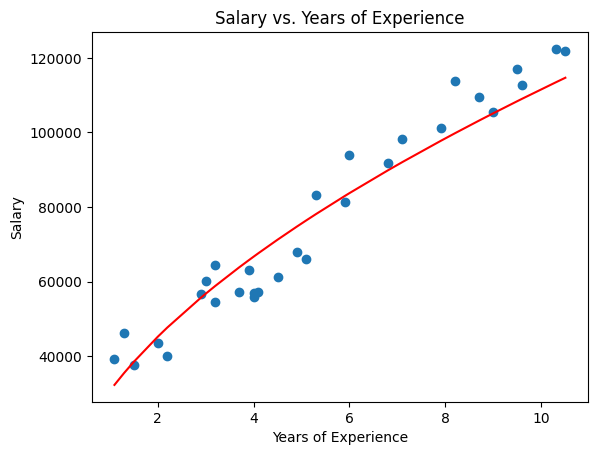

In [30]:
# Visualize the data and the regression line
plt.scatter(years_of_experience, salary);
plt.plot(years_of_experience, np.exp(model.predict(log_years_of_experience)), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')

# **SQRT TRANSFORMATION**

In [32]:
# Apply square root transformation to both years of experience and salary
sqrt_years_of_experience = np.sqrt(years_of_experience)
sqrt_salary = np.sqrt(salary)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(sqrt_years_of_experience, sqrt_salary)

LinearRegression()

In [33]:
# Print the model coefficients
print('Intercept:', model.intercept_)
print('Years of Experience coefficient:', model.coef_[0])

# Predict salary for 10 years of experience
sqrt_predicted_salary = model.predict([[np.sqrt(10)]])
predicted_salary = sqrt_predicted_salary[0] ** 2
print('Predicted salary for 10 years of experience:', predicted_salary)

Intercept: 103.56803064869723
Years of Experience coefficient: 75.62693189857455
Predicted salary for 10 years of experience: 117457.94972316659


In [35]:
#RMSE value
from sklearn.metrics import mean_squared_error

predicted_salary = model.predict(sqrt_years_of_experience) ** 2
rmse = np.sqrt(mean_squared_error(salary, predicted_salary))
print('RMSE:', rmse)

RMSE: 5960.647096174308


Text(0.5, 1.0, 'Salary vs. Years of Experience')

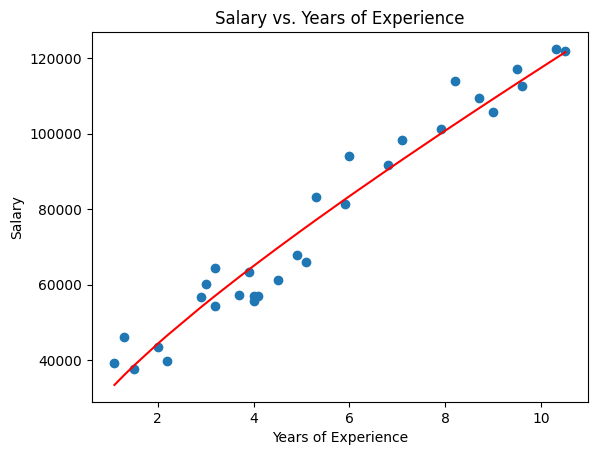

In [34]:
# Visualize the data and the regression line
plt.scatter(years_of_experience, salary);
plt.plot(years_of_experience, model.predict(sqrt_years_of_experience) ** 2, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')